# 대응표본 t 검정

In [1]:
#특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

df.head()

,before,after
0,216.289726,175.897620
1,190.279454,189.295934
2,217.744689,219.233935
3,235.021264,195.021021
4,234.098484,213.218227


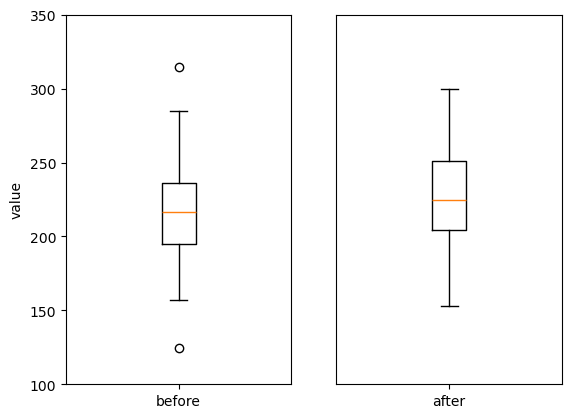

In [4]:
fig, ax = plt.subplots(1, 2)

ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])

ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])

ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [8]:
#특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

#귀무가설: 변화가 없다.
#대립가설: 변화가 있다.
from scipy.stats import shapiro

#정규성 검증
before = df['before']
after = df['after']

print(shapiro(before))
print(shapiro(after))
#p 값이 0.6, 0.69이기 때문에 정규성 가짐

from scipy.stats import levene
print()

print(levene(before,after))
#p 값이 0.8이기 때문에 등분산 가짐

#정규성 가짐, 등분산 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지 않음.

from scipy.stats import ttest_rel
print()
print(ttest_rel(before,after))

# pvalue=0.011, 이므로 대립가설(변화가 있다) 채택

#특정 질병 집단의 투약 전후 혈류량 변화가 있다.

ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)

TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


In [9]:
#특정 질병 집단의 투약 전후의 혈류량 변화르 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라.

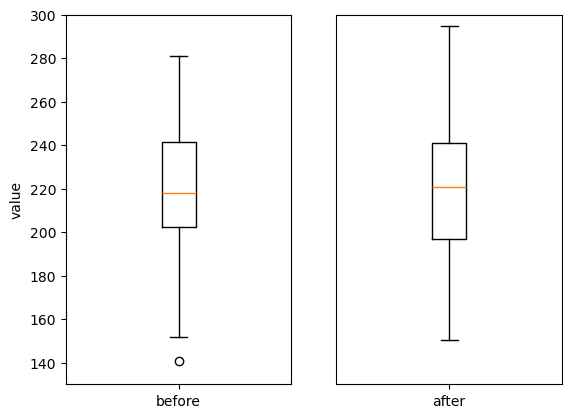

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [11]:
#이상치 발견,
df.head()

,before,after
0,253.566615,220.857837
1,195.080189,209.206667
2,228.299690,173.070057
3,279.417367,222.356980
4,230.062210,248.371045


In [15]:
from scipy.stats import shapiro

before = df['before']
after = df['after']

print(shapiro(before))
print(shapiro(after))

#p 값이 0.72, 0.72로 정규성을 가짐.

from scipy.stats import levene
print()
print(levene(before,after))

#pvalue=0.24 이므로 등분산을 가짐

#정규성, 등분산을 가지기 때문에 파라미터값에 변화 x

from scipy.stats import ttest_rel

print()
print(ttest_rel(before,after))
#pvalue=0.85이므로 귀무가설 채택()

#특정 질병 집단의 투약 전후의 혈류량 변화르 나타낸 데이터이다. 투약 전후 평균의 변화는 없다.

ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)

LeveneResult(statistic=1.3463330638203617, pvalue=0.24708279045237214)

TtestResult(statistic=0.188900575991026, pvalue=0.8504925317234707, df=119)


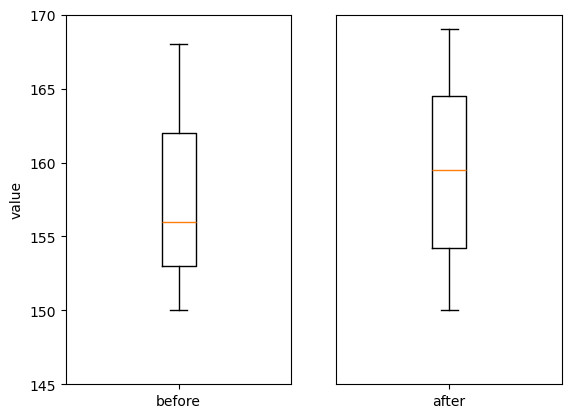

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [18]:
#특정 집단의 학습 전후 시험 성적 변화를 나타낸 데이터이다. 시험 전과 후에 차이가 있는지 검정하라
df.head()

,before,after
0,153,162
1,153,163
2,158,159
3,157,158
4,167,160


In [25]:
from scipy.stats import shapiro
before = df['before']
after = df['after']

from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

#p값이 0.001, 0.02로 정규성을 위배(정규성을 가지지 않음) ->비모수검정진행

from scipy.stats import levene
print()
print(levene(before,after))
#pvalue=0.70이므로 등분산을 가짐 - > 대응표본의 경우 등분산성이 파라미터에 영향을 주지 않음.

from scipy.stats import ttest_rel
print()
print(ttest_rel(before,after))
#pvalue=0.03 이므로 귀무가설을 기각, 하지만 비모수 검정을 진행해야함.

from scipy.stats import wilcoxon
print()
print(wilcoxon(before,after))
#pvalue=0.12이므로 귀무가설 채택, 시험 전과 후에 변화가 없다.

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)

LeveneResult(statistic=0.14329522146179022, pvalue=0.7058456563194881)

TtestResult(statistic=-2.187138399865287, pvalue=0.03353471744538162, df=49)

WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


c:\Users\rkh03\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


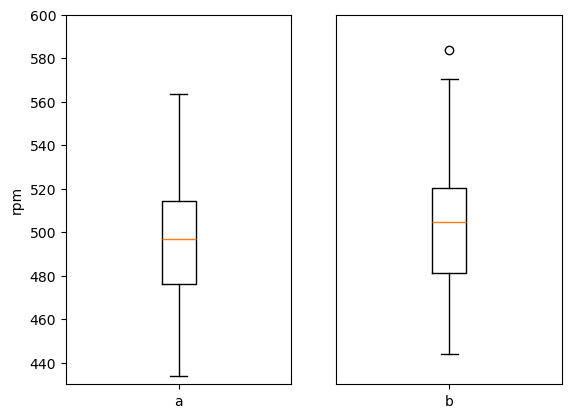

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430,600)
ax[1].set_ylim(430,600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [27]:
#한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다.
# (총 70세트) b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라

In [28]:
df.head()

,rpm,group
0,474.551593,a
1,450.548420,a
2,563.720934,a
3,506.886966,a
4,471.724049,a


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rpm     140 non-null    float64
 1   group   140 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [33]:
from scipy.stats import shapiro

a = df[df['group'] == 'a'].rpm
b = df[df['group'] == 'b'].rpm

print(shapiro(a))
print(shapiro(b))

#p값이 0.88, 0.55로 정규성을 가짐.

from scipy.stats import levene
print()
print(levene(a,b))
#pvalue=0.79이므로 등분산을 가짐

#정규성, 등분산 둘 다 만족, 하지만 대응표본에서 등분산은 파라미터에 영향 x

# (총 70세트) b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라가 문제이기 때문에 파라미터 조절
from scipy.stats import ttest_rel
print(ttest_rel(a,b,alternative='greater'))
#alternative='greater'의 의미는 a>b가 대립가설이 된다는 것.

# a < b: 귀무가설
# a > b : 대립가설

#p값이 0.96이기 때문에 귀무가설 채택 b가 a보다 크다.

# b 상황이 a 상황보다 rpm값이 높다.

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)

LeveneResult(statistic=0.06716114122680159, pvalue=0.7959020864923277)
TtestResult(statistic=-1.9018108294460812, pvalue=0.9693143365355352, df=69)


# 카이제곱 검정(교차분석)

1. 일원 카이제곱검정 (chisquare , 카이제곱 적합도 검정)
한 개의 요인에 의해 k개의 범주를 가질때 이론적 분포를 따르는지 검정
2. 이원 카이제곱검정 (chi2_contingency ,fisher_exact(빈도수 5개 이하 셀이 20% 이상일때) , 카이제곱독립검정)
모집단이 두개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정

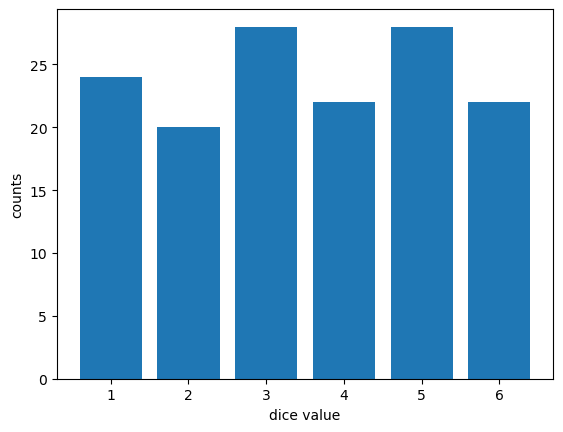

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [35]:
df.head()

,dice_number,counts
0,1,24
1,2,20
2,3,28
3,4,22
4,5,28


In [36]:
#144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 
#이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

In [38]:
#주사위 눈금의 발생확률은 1/6으로 모두 동일하다. 그러므로 각 눈금의 기대값은 실제 발생한 모든값을 6으로 나눈 값이다. 

from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts, df.expected))

#p값이 0.80이므로 귀무가설인 각 주사위 눈금 발생비율은 동일함. 채택.

Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)


In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [54]:
target = df.hands.value_counts().to_frame()
target

,count
hands,
right,420
left,80


In [63]:
#다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [67]:
cdf = pd.crosstab(df['측정회원성별'],df['등급'])

#cdf

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))

chi2, p, dof, expected = chi2_contingency(cdf)
print(p)

#p값이 7.48e-26이기 때문에 0에 근접하므로 대립가설 채택, 

# 귀무가설: 측정 회원 성별 등급간에 연관이 없다.(독립적이다)
# 대립가설: 측정 회원 성별 등급간에 연관이 있다.(독립적이지 않다.)

Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
7.481892813401677e-26


In [68]:
#성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라

In [69]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [76]:
df.describe()

,불참,참석,총합
count,3.000000,3.000000,3.000000
mean,3.333333,7.333333,10.666667
std,2.081666,4.725816,5.033223
min,1.000000,2.000000,6.000000
25%,2.500000,5.500000,8.000000
50%,4.000000,9.000000,10.000000
75%,4.500000,10.000000,13.000000
max,5.000000,11.000000,16.000000


In [77]:
#귀무가설: 성별과 참석간에 관련이 없다.(독립이다)
#대립가설: 성별과 참석간에 관련이 없다.(독립이 아니다.)

cdf = df.iloc[:-1,:-1]

display(cdf)

from scipy.stats import chi2_contingency, fisher_exact
print(chi2_contingency(cdf))
chi2, p, dof, expected = chi2_contingency(cdf)

print(p)
#pvalue=0.07이므로 5% 유의 수준안에서 귀무 가설 채택.

print(fisher_exact(cdf))
# 하지만 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정을 사용 해야한다.
# 피셔의 정확검정시 0.03의 값을 가지므로 귀무가설을 기각한다. 성별과 참석여부는 관련이 있다. (독립이 아니다.)


,불참,참석
남성,4,2
여성,1,9


Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117404, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))
0.07023259819117404
SignificanceResult(statistic=18.0, pvalue=0.03571428571428571)
